# Time Series for Stocks
Wanted to see the autocorrelation for the SPX within a few different time frames.

In [2]:
import pandas as pd
import numpy as np
import datetime
from pandas_datareader.data import DataReader

def read_data(ticker, data_source, start_date, end_date):
    
    df = DataReader(ticker, data_source, start_date, end_date)
    
    return df


end_date = datetime.datetime.today().strftime('%Y-%m-%d')
ticker = '^GSPC'

SPX = read_data(ticker, 'yahoo', '2017-01-01', end_date)
SPX.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-05-01,2642.959961,2655.270020,2625.409912,2654.800049,2654.800049,3559850000
2018-05-02,2654.239990,2660.870117,2631.699951,2635.669922,2635.669922,4010770000
2018-05-03,2628.080078,2637.139893,2594.620117,2629.729980,2629.729980,3851470000
2018-05-04,2621.449951,2670.929932,2615.320068,2663.419922,2663.419922,3327220000
2018-05-07,2669.360107,2681.320068,2669.360107,2675.750000,2675.750000,922575987


### Daily Autocorrelation Function

In [49]:
def autocorr_daily(df):
    """Input: DataFrame of ticker from above
        Output: If the ticker is mean reverting or trending daily"""
    
    returns = df.pct_change()
    autocorrelation = returns['Adj Close'].autocorr()
    
    if autocorrelation < 0:
        print('Ticker {} is daily mean reverting with autocorrelation: {}'.format(ticker, autocorrelation))
    else:
        print('Ticker {} is momentum bound or trending with autocorrelation: {}'.format(ticker, autocorrelation))
    
    return

autocorrelation = autocorr_daily(SPX)
autocorrelation

Ticker ^GSPC is daily mean reverting with autocorrelation: -0.05759773989839846


### Weekly Autocorrelation Function

In [50]:
def autocorr_weekly(df):
    """Input: DataFrame of ticker from above
        Output: If the ticker is mean reverting or trending weekly"""
    
    ticker_weekly = df.resample(rule='W').last()
    returns = ticker_weekly.pct_change()
    autocorrelation = returns['Adj Close'].autocorr()
    
    if autocorrelation < 0:
        print('Ticker {} is weekly mean reverting with autocorrelation: {}'.format(ticker, autocorrelation))
    else:
        print('Ticker {} is momentum bound or trending with autocorrelation: {}'.format(ticker, autocorrelation))
    
    return

autocorrelation_weekly = autocorr_weekly(SPX)
autocorrelation_weekly

Ticker ^GSPC is weekly mean reverting with autocorrelation: -0.12853253614401405


### Logical strategy would be to loop through many tickers, possibly all stocks in S&P 500.
If you loop through you could pull out the maximum and minimum autocorrelations which theoretically
would be the best to trade since you'd have insight if they mean revert or trend to a higher degree.

### Plot Autocorrelation Function

[ 1.00000000e+00 -5.50147512e-02 -1.90798590e-01  1.85151475e-01
  1.50517475e-02 -6.86996019e-02 -2.81520000e-03  9.23841212e-02
 -1.83195101e-01 -2.67259389e-02 -3.36225818e-02 -6.47277623e-02
 -1.12086569e-04 -3.03862149e-02 -4.10620450e-03 -1.68130381e-02
  3.02030732e-02  6.33142261e-02 -5.50307995e-03 -7.02273954e-02
 -6.96255632e-02  1.21677841e-02  1.91264143e-02 -3.87669395e-02
 -1.07113791e-01  5.86725007e-03  7.59914032e-02  4.85204135e-02
 -5.02901573e-02  9.12298235e-02  1.04022180e-01 -1.22690200e-01
  4.99235617e-02  1.06484511e-01 -3.44891081e-02  3.14848143e-02
  7.23430703e-02 -3.88114510e-02 -4.45024824e-02  4.20315691e-02
  1.66602045e-02]
The approximate confidence interval is +/- 0.11


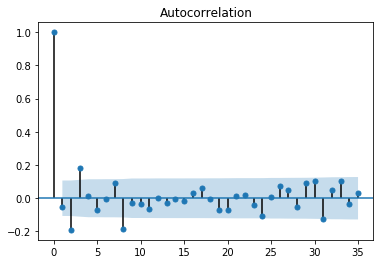

In [18]:
# Import the acf module and the plot_acf module from statsmodels
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt
from math import sqrt

time_by_adjusted_close = SPX.pct_change()['Adj Close']
returns = time_by_adjusted_close[1:,]

# Compute the acf array of HRB
acf_array = acf(returns)
print(acf_array)

# Find the number of observations by taking the length of the returns DataFrame
nobs = len(returns)

# Compute the approximate confidence interval
conf = 1.96/sqrt(nobs)
print("The approximate confidence interval is +/- %4.2f" %(conf))

# Plot the acf function, 95% CI w/ alpha=.05
plot_acf(returns, alpha=.05, lags=35)
plt.show()

### Above Graph: Significant autocorrs are daily returns of 2, 3, 8, and 31

### Dickey Fuller Test for Random Walk on PRICES
p-value = .59 is not significant and thus cannot be rejected that prices follow a random walk.

In [23]:
# Import the adfuller module from statsmodels
from statsmodels.tsa.stattools import adfuller

# Run the ADF test on the price series and print out the results
results = adfuller(SPX['Adj Close'])
print(results)

# Just print out the p-value
print('The p-value of the test on prices is: ' + str(results[1]))

(-1.375620407390803, 0.5939066004644469, 10, 327, {'1%': -3.45050711373316, '5%': -2.8704195794076743, '10%': -2.571500856923753}, 2756.2534392079424)
The p-value of the test on prices is: 0.5939066004644469


### Dickey Fuller Test for Random Walk on RETURNS
p-value << 0 is significant and thus can reject that returns follow a random walk.

In [25]:
# Import the adfuller module from statsmodels
from statsmodels.tsa.stattools import adfuller

# Run the ADF test on the price series and print out the results
results = adfuller(SPX['Adj Close'].pct_change().dropna())
print(results)

# Just print out the p-value
print('The p-value of the test on prices is: ' + str(results[1]))

(-7.2133631659663635, 2.205221461608643e-10, 9, 327, {'1%': -3.45050711373316, '5%': -2.8704195794076743, '10%': -2.571500856923753}, -2273.2938263286346)
The p-value of the test on prices is: 2.205221461608643e-10


### Example White Noise of Simulated Returns Data

The mean is 0.014 and the standard deviation is 0.050


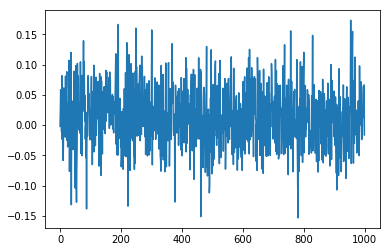

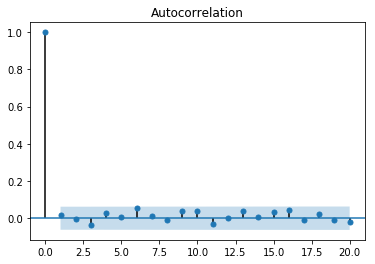

In [19]:
# Import the plot_acf module from statsmodels
from statsmodels.graphics.tsaplots import plot_acf

# Simulate wite noise returns
returns = np.random.normal(loc=0.02, scale=0.05, size=1000)

# Print out the mean and standard deviation of returns
mean = np.mean(returns)
std = np.std(returns)
print("The mean is %5.3f and the standard deviation is %5.3f" %(mean,std))

# Plot returns series
plt.plot(returns)
plt.show()

# Plot autocorrelation function of white noise returns
plot_acf(returns, lags=20)
plt.show()

### Notice that the simulated data is only white noise (because we made it that way) and that none of the autocorrs are significant

### Simulated Random Walk
If a time series exhibits a random walk then it cannot be forecasted.
Thus you must run a dickey-fuller test to see if the returns are significantly different from a random walk

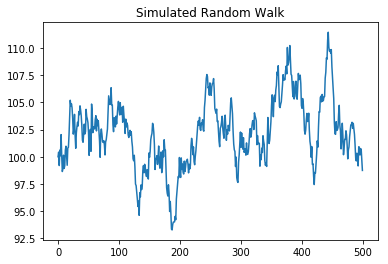

In [22]:
# Generate 500 random steps with mean=0 and standard deviation=1
steps = np.random.normal(loc=0, scale=1, size=500)

# Set first element to 0 so that the first price will be the starting stock price
steps[0]=0

# Simulate stock prices, P with a starting price of 100
P = 100 + np.cumsum(steps)

# Plot the simulated stock prices
plt.plot(P)
plt.title("Simulated Random Walk")
plt.show()

### Simulated Random Walk with Drift

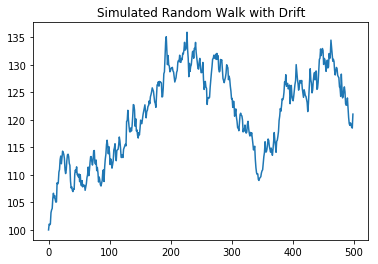

In [21]:
# Generate 500 random steps
steps = np.random.normal(loc=0.001, scale=.01, size=500) + 1

# Set first element to 1
steps[0]=1

# Simulate the stock price, P, by taking the cumulative product
P = 100 * np.cumprod(steps)

# Plot the simulated stock prices
plt.plot(P)
plt.title("Simulated Random Walk with Drift")
plt.show()